In [83]:
#uing KNN Regression and linear regression
import pandas as pd
rawdata = pd.read_csv(r'C:\Users\52296881\Downloads\train.csv')
testdata = pd.read_csv(r'C:\Users\52296881\Downloads\test.csv')
rawdata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [84]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [85]:
rawdata.drop_duplicates(inplace=True)

In [86]:
#checking low volume data
checkCols = rawdata[['Alley','FireplaceQu','PoolQC','Fence','MiscFeature','SalePrice']]

In [87]:
import seaborn as sns

In [88]:
checkCols.Alley.unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

D:\Softwares\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

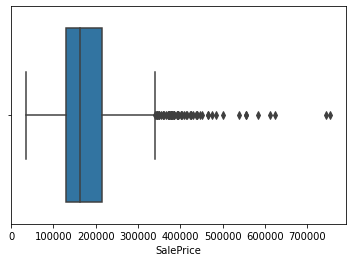

In [89]:
sns.boxplot(checkCols.SalePrice)

In [90]:
rawdata = rawdata[rawdata.SalePrice < 500000]

In [91]:
rawdata.fillna(0,inplace=True)

In [92]:
rawdata

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,0,Reg,Lvl,AllPub,...,0,0,MnPrv,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,0,Reg,Lvl,AllPub,...,0,0,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,142125


In [93]:
rawdata['Utilities'].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [94]:
rawdata.groupby('Utilities').agg('mean')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Utilities,,,,,,,,,,,,,,,,,,,,,
AllPub,729.931034,56.986207,57.407586,10440.035862,6.07931,5.577931,1971.08069,1984.768276,99.668276,438.034483,...,93.733793,46.406207,22.105517,3.433103,14.609655,2.395172,43.788966,6.335172,2007.813103,178300.991724
NoSeWa,945.000000,20.000000,0.000000,14375.000000,6.00000,6.000000,1958.00000,1958.000000,541.000000,111.000000,...,0.000000,118.000000,0.000000,0.000000,233.000000,0.000000,0.000000,1.000000,2009.000000,137500.000000


In [95]:
rawdata.groupby('YearBuilt').agg('mean')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
YearBuilt,,,,,,,,,,,,,,,,,,,,,
1872,1350.000000,70.000000,50.00000,5250.000000,8.000000,5.000000,1987.000000,0.000000,259.000000,0.0,...,0.000000,54.000000,20.000000,0.00,0.000000,0.0,0.0,12.000000,2008.000000,122000.000000
1875,1138.000000,50.000000,54.00000,6342.000000,5.000000,8.000000,1996.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,176.000000,0.00,0.000000,0.0,0.0,5.000000,2010.000000,94000.000000
1880,704.250000,71.250000,73.00000,12246.500000,6.250000,6.500000,1986.500000,0.000000,0.000000,0.0,...,120.750000,12.000000,169.750000,0.00,0.000000,0.0,0.0,5.250000,2007.500000,200619.750000
1882,992.000000,70.000000,121.00000,17671.000000,8.000000,9.000000,1986.000000,0.000000,216.000000,0.0,...,0.000000,169.000000,0.000000,0.00,0.000000,0.0,0.0,11.000000,2009.000000,168000.000000
1885,762.000000,110.000000,60.00000,11070.000000,4.000000,6.500000,1972.500000,0.000000,0.000000,0.0,...,0.000000,0.000000,57.000000,0.00,0.000000,0.0,225.0,6.000000,2008.500000,111250.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,779.179104,51.940299,76.41791,10402.432836,7.567164,5.000000,2006.313433,164.641791,333.223881,0.0,...,127.626866,67.701493,0.552239,0.00,4.402985,0.0,0.0,7.000000,2006.970149,251775.447761
2007,692.795918,42.857143,78.22449,10456.306122,7.734694,5.081633,2007.306122,174.102041,500.224490,0.0,...,107.448980,82.244898,0.000000,0.00,14.163265,0.0,0.0,7.040816,2007.836735,255362.734694
2008,929.250000,44.000000,92.35000,13857.000000,8.550000,5.000000,2008.250000,299.500000,772.350000,0.0,...,117.400000,99.800000,0.000000,22.85,11.200000,24.0,0.0,6.650000,2008.800000,319188.000000


In [96]:
#rawdata.drop('Id',axis = 1,inplace=True)
#testdata.drop(['Id'],axis=1,inplace=True)
rawdata.drop(['Id','LotFrontage','Street','Alley','LandSlope','Condition2','YearRemodAdd','Exterior2nd','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','GarageCars','MoSold'],axis=1, inplace=True)
testdata.drop(['Id','LotFrontage','Street','Alley','LandSlope','Condition2','YearRemodAdd','Exterior2nd','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','GarageCars','MoSold'],axis=1, inplace=True)

In [97]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [98]:
set(rawdata['MSZoning'].unique()).union( set(testdata['MSZoning'].unique()))

{'C (all)', 'FV', 'RH', 'RL', 'RM', nan}

In [99]:
testdata.fillna(0,inplace=True)
testdata.isna().sum()

MSSubClass       0
MSZoning         0
LotArea          0
LotShape         0
LandContour      0
                ..
MiscFeature      0
MiscVal          0
YrSold           0
SaleType         0
SaleCondition    0
Length: 67, dtype: int64

In [100]:
le = LabelEncoder()
for col in rawdata.select_dtypes(include='object').columns:
    fitdata = list(set(rawdata[col].unique()).union(set(testdata[col].unique())))
    le.fit(fitdata)
    rawdata[col] = le.transform(rawdata[col].astype(str))
    testdata[col] = le.transform(testdata[col].astype(str))

In [101]:
rawdata.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,BldgType,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,YrSold,SaleType,SaleCondition,SalePrice
0,60,4,8450,3,3,1,4,5,2,0,...,0,0,0,0,0,0,2008,9,4,208500
1,20,4,9600,3,3,1,2,24,1,0,...,0,0,0,0,0,0,2007,9,4,181500
2,60,4,11250,0,3,1,4,5,2,0,...,0,0,0,0,0,0,2008,9,4,223500
3,70,4,9550,0,3,1,0,6,2,0,...,0,0,0,0,0,0,2006,9,0,140000
4,60,4,14260,0,3,1,2,15,2,0,...,0,0,0,0,0,0,2008,9,4,250000


In [105]:
X_data = rawdata.iloc[:,0:67]
Y_data = rawdata.iloc[:,67]

In [106]:
ss = StandardScaler()
X_data = ss.fit_transform(X_data)
testdata = ss.transform(testdata)

In [107]:
X_train,X_test,Y_train,Y_test = train_test_split(X_data,Y_data,train_size=0.2,random_state=12)

In [108]:
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt

In [109]:
rms = []
for i in range(1,10):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred = knn.predict(X_test)
    rms.append(sqrt(mean_squared_error(Y_test,pred)))
    
    

<AxesSubplot:>

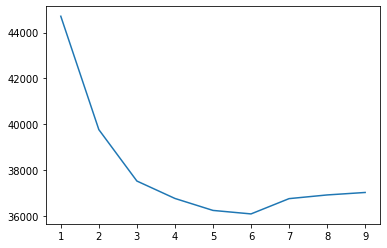

In [110]:
sns.lineplot(x=range(1,10),y=rms)

In [114]:
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train,Y_train)
pred = knn.predict(testdata)

In [115]:
pred

array([131991.66666667, 163291.66666667, 188916.66666667, ...,
       155916.66666667, 108883.33333333, 221083.33333333])

<AxesSubplot:ylabel='SalePrice'>

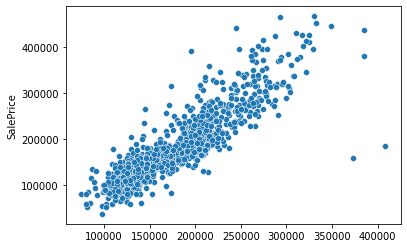

In [132]:
sns.scatterplot(x=pred,y=Y_test)

In [116]:
len(pred)

1459

In [122]:
#predict using Linear Regression
from sklearn.linear_model import LinearRegression

In [123]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
lrpredict = lr.predict(X_train)

<AxesSubplot:xlabel='SalePrice'>

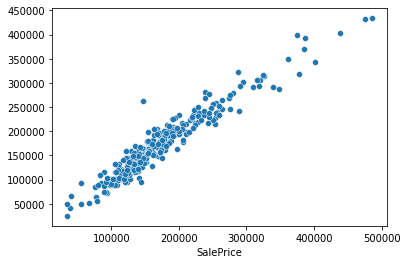

In [124]:
sns.scatterplot(x= Y_train,y= lrpredict)

In [130]:
lrpredict = lr.predict(X_test)

In [131]:
lrpredict

array([202738.70703125, 157640.56835938, 140417.5546875 , ...,
       211341.27539062, 188721.23828125, 240386.6796875 ])